In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns

In [3]:
#Load the data set
#import pandas as pd
# from google.colab import files
# claimants  = files.upload()
claimants = pd.read_csv(r"C:\Users\Bhaskar Kumbhar\ExcelR\Artificial Intelligence Course\Logistic Regression\claimants.csv")
claimants.head()

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038


In [4]:
# Drop the case number column, as it is not required
claimants.drop(["CASENUM"],inplace = True, axis = 1)
claimants.shape, claimants.head()

((1340, 6),
    ATTORNEY  CLMSEX  CLMINSUR  SEATBELT  CLMAGE    LOSS
 0         0     0.0       1.0       0.0    50.0  34.940
 1         1     1.0       0.0       0.0    18.0   0.891
 2         1     0.0       1.0       0.0     5.0   0.330
 3         0     0.0       1.0       1.0    31.0   0.037
 4         1     0.0       1.0       0.0    30.0   0.038)

In [5]:
# Shape of the Data Set
claimants.shape

(1340, 6)

In [6]:
claimants.isnull().sum()

ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [7]:
# Removing NA values in the dataset
claimants = claimants.dropna()
claimants.shape

(1096, 6)

In [8]:
claimants.isnull().sum()

ATTORNEY    0
CLMSEX      0
CLMINSUR    0
SEATBELT    0
CLMAGE      0
LOSS        0
dtype: int64

In [9]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [10]:
# Dividing our data into input and ouput variables
X = claimants.iloc[:,1:]
Y = claimants.iloc[:,0]

In [11]:
#Logistic regression and fit the model
classifier = LogisticRegression()
classifier.fit(X,Y)
# classifier.write_to_pickle('path of file.pkl')

LogisticRegression()

In [12]:
claimants

,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,0,0.0,1.0,0.0,50.0,34.940
1,1,1.0,0.0,0.0,18.0,0.891
2,1,0.0,1.0,0.0,5.0,0.330
3,0,0.0,1.0,1.0,31.0,0.037
4,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...
1334,1,1.0,1.0,0.0,16.0,0.060
1336,0,1.0,1.0,0.0,46.0,3.705
1337,1,1.0,1.0,0.0,39.0,0.099
1338,0,1.0,0.0,0.0,8.0,3.177


In [13]:
#Predict for X dataset
# classifer.read_pickle_file('path of file.pkl')
y_pred = classifier.predict(X)

In [14]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [15]:
classifier.predict_proba(X)

array([[9.99996954e-01, 3.04621690e-06],
       [4.92851125e-01, 5.07148875e-01],
       [4.24833157e-01, 5.75166843e-01],
       ...,
       [2.60971335e-01, 7.39028665e-01],
       [7.14059407e-01, 2.85940593e-01],
       [3.19568787e-01, 6.80431213e-01]])

In [16]:
y_pred

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [17]:
y_pred_df = pd.DataFrame({'actual': Y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})

In [18]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
display(y_pred_df)
#y_pred_df['correct'].mean()
# y_pred_df['correct'].value_counts()


,actual,predicted,correct
0,0,0,True
1,1,1,True
2,1,1,True
3,0,0,True
4,1,1,True
...,...,...,...
1334,1,1,True
1336,0,0,True
1337,1,1,True
1338,0,0,True


In [19]:
#y_pred_df[y_pred_df['correct']=='False']

In [20]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[381 197]
 [123 395]]


In [21]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70       578
           1       0.67      0.76      0.71       518

    accuracy                           0.71      1096
   macro avg       0.71      0.71      0.71      1096
weighted avg       0.71      0.71      0.71      1096



In [22]:
# ROC Curve

In [23]:
#classifier.predict_proba(X)[:,1]

Text(0, 0.5, 'True Positive Rate')

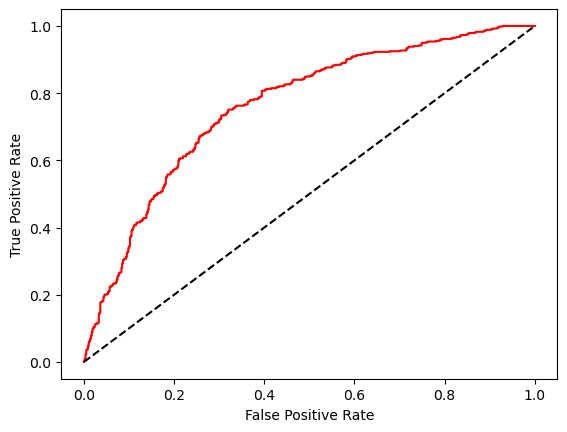

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, _ = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [25]:
auc

0.7108589063606365

### Method 2 

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [28]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((876, 5), (220, 5), (876,), (220,))

In [29]:
X_train

,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
2,0.0,1.0,0.0,5.0,0.330
6,0.0,1.0,0.0,9.0,3.538
719,1.0,1.0,0.0,33.0,0.781
769,1.0,1.0,0.0,40.0,0.969
1035,0.0,1.0,0.0,10.0,0.663
...,...,...,...,...,...
393,1.0,1.0,0.0,3.0,0.035
572,0.0,1.0,0.0,3.0,0.600
152,1.0,1.0,0.0,6.0,0.075
1275,1.0,1.0,0.0,5.0,0.190


In [30]:
classifier.fit(X_train,y_train)

LogisticRegression()

In [31]:
classifier.score(X_train,y_train)

0.7146118721461188

In [32]:
classifier.predict(X_test)

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1],
      dtype=int64)

In [33]:
classifier.score(X_test, y_test)

0.6772727272727272

Text(0.5, 23.52222222222222, 'Predicted')

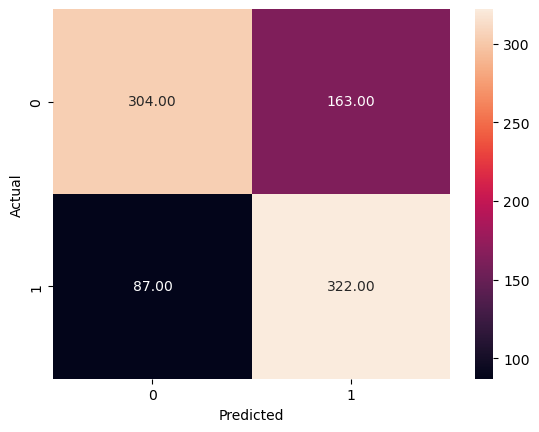

In [34]:
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_train, classifier.predict(X_train))

sns.heatmap(log_cm, annot=True, fmt='.2f',
         xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Actual')
plt.xlabel('Predicted')

Text(0.5, 23.52222222222222, 'Predicted')

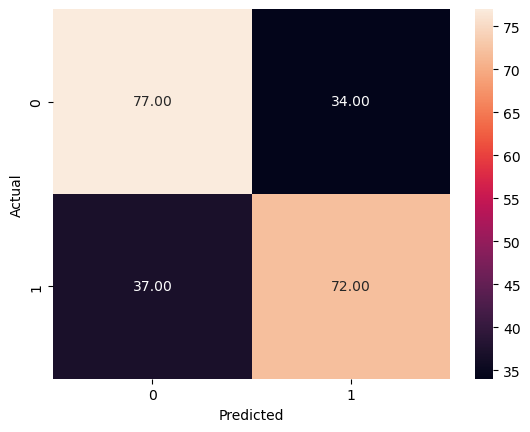

In [35]:
from sklearn.metrics import confusion_matrix

log_cm = confusion_matrix(y_test, classifier.predict(X_test))

sns.heatmap(log_cm, annot=True, fmt='.2f',
         xticklabels = ["0", "1"] , yticklabels = ["0", "1"] )

plt.ylabel('Actual')
plt.xlabel('Predicted')